### Load data

In [1]:
import pandas as pd
books_data = pd.read_csv('data/books_data.csv')
books_ratings = pd.read_csv('data/books_rating.csv')

In [2]:
# Titles
books_data_1 = books_data.drop(['image', 'previewLink', 'infoLink', 'publisher', 'ratingsCount'], axis=1, inplace=False)
books_ratings_1 = books_ratings.drop(['Id','Price', 'profileName', 'review/time'], axis=1, inplace=False)

books_data_1.rename(columns={'Title': 'title','publishedDate': 'published_date'}, inplace=True)
books_ratings_1.rename(columns={'Title': 'title','User_id':'user_id',  'review/score': 'score','review/helpfulness': 'helpfulness', 'review/text': 'text', 'review/summary': 'summary'}, inplace=True)

print(list(books_data_1.columns))
print(list(books_ratings_1.columns))

['title', 'description', 'authors', 'published_date', 'categories']
['title', 'user_id', 'helpfulness', 'score', 'summary', 'text']


In [3]:
books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: s.lower() if type(s) == str else s)
books_ratings_1['title'] = books_ratings_1['title'].replace(r"\(.*\)","", regex=True)
books_ratings_1['title'] = books_ratings_1['title'].replace(r"\&","and", regex=True)

books_data_1['title'] = books_data_1['title'].map(lambda s: s.lower() if type(s) == str else s)
books_data_1['title'] = books_data_1['title'].replace(r"\(.*\)","", regex=True)
books_data_1['title'] = books_data_1['title'].replace(r"\&","and", regex=True)

# remove all special characters with regex
books_ratings_1['title'] = books_ratings_1['title'].replace(r"[^a-zA-Z0-9\s]+", "", regex=True)
books_data_1['title'] = books_data_1['title'].replace(r"[^a-zA-Z0-9\s]+", "", regex=True)

In [4]:
# keep only unique titles in books_data_1
books_data_1 = books_data_1.drop_duplicates(subset=['title'], keep='first')

In [5]:
len(books_data_1)

204904

In [6]:
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'the hobbit' if (type(s) == str and 'hobbit' in s) else s)
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'lord of the rings' if (type(s) == str and 'lord of the rings' in s) else s)
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'pride and prejudice' if (type(s) == str and 'pride & prejudice' in s) else s)
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'pride and prejudice' if (type(s) == str and 'pride and prejudice' in s) else s)
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'the great gatsby' if (type(s) == str and 'great gatsby' in s) else s)
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'to kill a mocking bird' if (type(s) == str and 'mocking bird' in s) else s)
#books_ratings_1['title'] = books_ratings_1['title'].map(lambda s: 'to kill a mocking bird' if (type(s) == str and 'mockingbird' in s) else s)


#books_data_1['title'] = books_data_1['title'].map(lambda s: 'the hobbit' if (type(s) == str and 'hobbit' in s) else s)
#books_data_1['title'] = books_data_1['title'].map(lambda s: 'lord of the rings' if (type(s) == str and 'lord of the rings' in s) else s)
#books_data_1['title'] = books_data_1['title'].map(lambda s: 'pride and prejudice' if (type(s) == str and 'pride & prejudice' in s) else s)
#books_data_1['title'] = books_data_1['title'].map(lambda s: 'pride and prejudice' if (type(s) == str and 'pride and prejudice' in s) else s)
#books_data_1['title'] = books_data_1['title'].map(lambda s: 'the great gatsby' if (type(s) == str and 'great gatsby' in s) else s)
#books_data_1['title'] = books_data_1['title'].map(lambda s: 'to kill a mocking bird' if (type(s) == str and 'mocking bird' in s) else s)
#books_data_1['title'] = books_data_1['title'].map(lambda s: 'to kill a mocking bird' if (type(s) == str and 'mockingbird' in s) else s)

In [7]:
# load book data for books in book ratings
ratings_titles = books_ratings_1['title'].unique()
books_data_1 = books_data_1[books_data_1['title'].isin(ratings_titles)]

In [8]:
n_ratings = books_ratings_1.groupby('title').count()['score']>=10
famous_books = n_ratings[n_ratings].index
books_ratings_1 = books_ratings_1[books_ratings_1['title'].isin(famous_books)]

n_ratings_1 = books_ratings_1['title'].value_counts().rename("n_ratings")

#books_data_1 = books_data_1.merge(n_ratings_1, on='title', how='inner')
#print(books_data_1.columns)

In [9]:
x = books_ratings_1.groupby('user_id').count()['score'] > 20 # since this is what amazon requires before a user can get recommendations
considerable_users = x[x].index
books_ratings_1 = books_ratings_1[books_ratings_1['user_id'].isin(considerable_users)]
#
# print(books_ratings_1.sample(5))

books_ratings_1['user_id'].value_counts()

A1D2C0WDCSHUWZ    2996
AFVQZQ8PW0L       2402
A14OJS0VWMOSWO    2399
A1X8VZWTOG8IS6    1428
A1K1JW1C5CUSUZ    1221
                  ... 
AHZFJ1Z2A3FKQ       21
A3ETKZH4PM6QEV      21
A1EW7XKKEE1XHO      21
A25JBI5D5ZH2KY      21
A17BUXSHOUOP4M      21
Name: user_id, Length: 7740, dtype: int64

In [10]:
books_ratings_1['title'].value_counts()

pride and prejudice                                                                                   5510
wuthering heights                                                                                     4922
the picture of dorian gray                                                                            3241
wuthering heights                                                                                     3126
little women or meg jo beth and amy                                                                   2995
                                                                                                      ... 
the gurus guide to sql server stored procedures xml and html                                             1
at the eleventh hour the biography of swami rama                                                         1
the marriage builder a blueprint for couples and counselors  now with discussion guide for couples       1
from here you cant see paris  seasons

In [11]:
# extract all books rated by A14OJS0VWMOSWO
books_ratings_1[books_ratings_1['user_id'] == 'A14OJS0VWMOSWO']['title'].value_counts()

alices adventures in wonderland                                              18
ulysses                                                                      10
great expectations                                                           10
the white company                                                             9
jane eyre                                                                     7
                                                                             ..
beach road                                                                    1
250 continuousline quilting designs for hand machine and longarm quilters     1
the travelers gift                                                            1
wils bones                                                                    1
rats                                                                          1
Name: title, Length: 2023, dtype: int64

In [12]:
avg_rating = books_ratings_1.groupby('title')["score"].mean().rename("avg_rating")
books_data_1 = books_data_1.merge(avg_rating, on='title', how='inner')
#print(books_data_1.columns)


In [13]:
def get_n_helpful(x):
    if isinstance(x, str) and '/' in x:
        num, denom = x.split('/')
        return int(denom)
    else:
        return x

def replace_fraction(x):
    if isinstance(x, str) and '/' in x:
        num, denom = x.split('/')
        if denom == '0':
            return 0
        else:
            return int(num) / int(denom)
    else:
        return x

books_ratings_1['helpfulness_count'] = books_ratings_1['helpfulness'].apply(get_n_helpful)
books_ratings_1['helpfulness_pct'] = books_ratings_1['helpfulness'].apply(replace_fraction)

#print(books_ratings_1.sample(2))

In [14]:
#print(books_data_1.columns)

In [15]:
#def extract_year(x):
#    year1 = pd.to_datetime(x, format='mixed').year
##    print(year1)
#    return year1
    
#books_data_1['published_date'] = books_data_1['published_date'].apply(extract_year)
#p#rint(books_data_1.sample(5))


In [16]:
import os
if not os.path.exists('clean_data'):
    os.makedirs('clean_data')

# save clean data
books_data_1.to_csv('clean_data/books_data_clean.csv')
books_ratings_1.to_csv('clean_data/books_rating_clean.csv')

print("First we had {} books and {} ratings".format(len(books_data), len(books_ratings)))
print("Now we have {} books and {} ratings".format(len(books_data_1), len(books_ratings_1)))

First we had 212404 books and 3000000 ratings
Now we have 32932 books and 432820 ratings


In [17]:
books_data_1.head()

,title,description,authors,published_date,categories,avg_rating
0,eyewitness travel guide to europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",2015-06-15,['Europe'],4.666667
1,voices from the farm adventures in community l...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],2012-08-21,['Biography & Autobiography'],5.000000
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.000000
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.000000
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.000000


In [18]:
books_ratings_1.head()

,title,user_id,helpfulness,score,summary,text,helpfulness_count,helpfulness_pct
140,eyewitness travel guide to europe,A281NPSIMI1C2R,19/19,5.0,The Major Sights in Twenty Countries - Amazing!,"Yes, this is one heavy book. It is more than l...",19,1.000000
141,eyewitness travel guide to europe,A2TAPL67U2A5HM,12/13,5.0,Europe (Eyewitness Travel Guides) by Dan Colwell,Eyewitness travel guides are splendid and this...,13,0.923077
142,eyewitness travel guide to europe,AT9YSY20RJUDX,11/13,4.0,Helpful guide on tours through Europe,I recently took a backpack trip through Europe...,13,0.846154
182,voices from the farm adventures in community l...,A1ER5AYS3FQ9O3,6/7,5.0,Intense memoir told in brief segments by forme...,This book gave me a glimpse at life on The Far...,7,0.857143
217,tess and the highlander,A2VCGJLKGK2WJJ,17/18,5.0,My new favorite book from the Avon True Romanc...,Tess was washed ashore on the Isle of May duri...,18,0.944444


# Similar items

In [19]:
books_data_1['title'].value_counts()

leave it to me a novel                                      1
the persian puzzle the conflict between iran and america    1
autobiography of madame guyon                               1
the hemingway book club of kosovo                           1
with this ring                                              1
                                                           ..
the midnight before christmas                               1
mirror mirror                                               1
the art of faery                                            1
sundiver                                                    1
                                                            1
Name: title, Length: 32932, dtype: int64

## Jaccard Similarity
Function jaccard, that takes two titles and outputs the estimated jaccard similarity.

In [66]:
def jaccard(title1, title2):
    words1 = set(str(title1).lower().split())
    words2 = set(str(title2).lower().split())
    
    # Compute the intersection and union of the sets
    intersection = len(words1.intersection(words2))
    union = len(words1) + len(words2) - intersection
    
    # Calculate the Jaccard similarity
    similarity = intersection / union if union > 0 else 0.0
    
    return similarity

def max_jaccard(title_list):
    max_similarity = 0.0
    idx1 = 0
    idx2 = 0
    for i in range(len(title_list)):
        for j in range(i + 1, len(title_list)):
            similarity = jaccard(title_list[i], title_list[j])
            if similarity > max_similarity:
                idx1 = i
                idx2 = j
                max_similarity = similarity
    return max_similarity,idx1,idx2

# Example usage for comparing two titles
#title1 = books_data_1['title'][0]
#title2 = books_data_1['title'][1]
#print(title1,title2)
#similarity = jaccard(title1, title2)
#print(f"Jaccard Similarity: {similarity}")


# Example usage with a list of titles
n = 100
title_list = books_data_1['title'][0:n]
max_similarity,idx1,idx2 = max_jaccard(title_list)
print(f"Max Jaccard Similarity: {max_similarity}")
print(books_data_1['title'][idx1])
print(books_data_1['title'][idx2])


KeyError: 10

## Similar items using Jaccard similarity

In [21]:
def similar(names, jaccard_threshold=0.6):
    # Create a dictionary to store the similar names
    similar_names = {}
    
    # Loop through each name in the list
    for i in range(len(names)):
        for j in range(i+1, len(names)):
            similarity_score = jaccard(names[i], names[j])
            if similarity_score >= jaccard_threshold:
                similar_names[(names[i], names[j])] = similarity_score
    return similar_names

# Example usage:    
names = books_data_1['title'][0:500]
similar_names = similar(names)
# Print titles in a way that is easier to read

for (desc1, desc2), score in similar_names.items():
    print(f"Similarity Score: {score}")
    print(f"Title 1: {desc1}")
    print(f"Title 2: {desc2}")
    print()


Similarity Score: 0.6
Title 1: the art of the novel
Title 2: the art of loving

Similarity Score: 1.0
Title 1: romola 
Title 2: romola

Similarity Score: 1.0
Title 1: chopin the man and his music
Title 2: chopin  the man and his music

Similarity Score: 0.6
Title 1: the life of david
Title 2: the life of jesus 

Similarity Score: 0.6
Title 1: the holy spirit
Title 2: the baptism with the holy spirit



In [22]:
# Example usage for finding similar descriptions
descritions = books_data_1['description'][0:400]
similar_descriptions = similar(descritions,jaccard_threshold=0.4)

# Print descriptions in a way that is easier to read
for (desc1, desc2), score in similar_descriptions.items():
    print(f"Similarity Score: {score}")
    print(f"Description 1: {desc1}")
    print(f"Description 2: {desc2}")
    print()


Similarity Score: 1.0
Description 1: nan
Description 2: nan



## Locality-Sensitive Hashing

In [23]:
# keep only unique titles in books_data_1
print(len(books_data_1))
books_data_1 = books_data_1.drop_duplicates(subset=['description'], keep='first')
print(len(books_data_1))

32932
25148


In [24]:
import numpy as np
import mmh3

In [25]:
# split a string into k blocks of characters where
def split_k(word,k):
    n = len(word)
    if k > n:
        return split_k(word,int(k/2))
    else:
        if k == 0:
            return word
        n1 = n//k
        n2 = n1 + n%k
        return [word[i:i+n1] for i in range(0, n, n1)]
    

n = 5
split_k(books_data_1['title'][n],6)

['the complete ill',
 'ustrated guide t',
 'o chinese medici',
 'ne a comprehensi',
 've system for he',
 'alth and fitness']

In [26]:
names = books_data_1['title'][0:2]
names = names.to_dict()
print(names)

for key, values in names.items():
    print(key)
    print(values)


{0: 'eyewitness travel guide to europe', 1: 'voices from the farm adventures in community living'}
0
eyewitness travel guide to europe
1
voices from the farm adventures in community living


In [27]:
# Implement the LSH algorithm
b = 10

def lsh(names, jaccard_threshold,seed):
    lsh_dict = {}
    for key, name in names.to_dict().items():
        blocks = split_k(name,b)
        blocks_hash_values = []
        for aBlock in blocks:
            blocks_hash_values.append(mmh3.hash(aBlock, seed))
        lsh_dict[key] = blocks_hash_values
    list_keys = list(lsh_dict.keys())
    similar_items = {}
    for i in range(len(list_keys)-1):
        if i% 500 == 0:
            print(i)
        for j in range(i+1, len(list_keys)):
            common_values = np.intersect1d(lsh_dict[list_keys[i]], lsh_dict[list_keys[j]])
            if len(common_values) > 0:
                # we found a candidate
                similarity_score = jaccard(names[list_keys[i]], names[list_keys[j]])
                if similarity_score >= jaccard_threshold:
                    similar_items[(list_keys[i], list_keys[j])] = similarity_score
    return similar_items

n = 2000

#for (desc1, desc2), score in similar_descriptions.items():
 #   if score == 1:
  #      df = df.drop(desc2)

titles = books_data_1['title'][0:n]
found_similar_items_with_lsh = lsh(titles,jaccard_threshold=0.6,seed=42)
# Print the results
for (title1, title2), score in found_similar_items_with_lsh.items():
    print(f"Similarity Score: {score}")
    print(f"Title 1: {titles[title1]}")
    print(f"Title 2: {titles[title2]}")
    print()
    if score == 1:
        books_data_1 = books_data_1.drop(title2)

0


500
1000
1500
Similarity Score: 0.6
Title 1: the art of the novel
Title 2: the art of pianoplaying

Similarity Score: 1.0
Title 1: the chosen 
Title 2: the chosen

Similarity Score: 1.0
Title 1: chopin the man and his music
Title 2: chopin  the man and his music

Similarity Score: 0.6
Title 1: the shadow of the lion
Title 2: shadow of the hegemon

Similarity Score: 0.6
Title 1: the life of david
Title 2: the life of jesus 

Similarity Score: 1.0
Title 1: nostromo
Title 2: nostromo 

Similarity Score: 1.0
Title 1: mayor of casterbridge the
Title 2: the mayor of casterbridge 

Similarity Score: 0.6
Title 1: the art of loving
Title 2: the art of pianoplaying

Similarity Score: 0.6
Title 1: out of the blue
Title 2: out of the silence

Similarity Score: 1.0
Title 1: brave new world 
Title 2: brave new world

Similarity Score: 0.7142857142857143
Title 1: the complete idiots guide to taoism
Title 2: the complete idiots guide to paganism

Similarity Score: 1.0
Title 1: a connecticut yankee in 

In [28]:
found_similar_items_with_lsh

{(80, 1924): 0.6,
 (124, 1800): 1.0,
 (145, 176): 1.0,
 (172, 2263): 0.6,
 (180, 419): 0.6,
 (316, 2361): 1.0,
 (470, 825): 1.0,
 (484, 1924): 0.6,
 (695, 1107): 0.6,
 (759, 2011): 1.0,
 (767, 927): 0.7142857142857143,
 (896, 2215): 1.0,
 (992, 1749): 0.6666666666666666,
 (1066, 2042): 0.6,
 (1258, 1374): 0.6,
 (1262, 2273): 1.0,
 (1276, 1572): 1.0,
 (1517, 1707): 0.6,
 (1621, 1635): 0.6,
 (1823, 1855): 0.7777777777777778,
 (2100, 2355): 0.6,
 (2223, 2355): 0.6}

In [29]:
df['title'][2]

NameError: name 'df' is not defined

In [ ]:
df.drop(0)

,title,description,authors,published_date,categories,avg_rating
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.0
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.0
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.0
5,the complete illustrated guide to chinese medi...,"This beautifully illustrated, full-color book ...",['Tom Williams'],2003,['Health & Fitness'],4.5
6,night world daughters of darkness,"""There’s something strange about the new girls...",['L.J. Smith'],2016-12-06,['Juvenile Fiction'],3.5
...,...,...,...,...,...,...
32927,thin within,"I want to lose weight, but dieting just doesn'...","['Judy Halliday', 'Arthur Halliday']",2005-04-17,['Health & Fitness'],5.0
32928,sell and resell your photos,Sell your photos again and again! Live anywher...,"['Rohn Engh', 'Mikael Karlsson']",2016-08-17,['Photography'],3.0
32929,dear friends american photographs of men toget...,NaN,NaN,NaN,NaN,5.0
32930,sofia,NaN,NaN,NaN,NaN,5.0


In [ ]:
df.head()

,title,description,authors,published_date,categories,avg_rating
0,eyewitness travel guide to europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",2015-06-15,['Europe'],4.666667
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.000000
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.000000
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.000000
5,the complete illustrated guide to chinese medi...,"This beautifully illustrated, full-color book ...",['Tom Williams'],2003,['Health & Fitness'],4.500000


In [ ]:
print(found_similar_items_with_lsh)


{(180, 419): 0.6, (695, 1107): 0.6, (767, 927): 0.7142857142857143}


In [ ]:
print(books_data_1['title'][767])
print(books_data_1['title'][927])

the complete idiots guide to taoism
the complete idiots guide to paganism


In [ ]:
b = 10

def lsh(names, jaccard_threshold,seed):
    lsh_dict = {}
    for key, name in names.to_dict().items():
        blocks = split_k(name,b)
        blocks_hash_values = []
        for aBlock in blocks:
            blocks_hash_values.append(mmh3.hash(aBlock, seed))
        lsh_dict[key] = blocks_hash_values
    list_keys = list(lsh_dict.keys())
    similar_items = {}
    for i in range(len(list_keys)-1):
        if i% 500 == 0:
            print(i)
        for j in range(i+1, len(list_keys)):
            common_values = np.intersect1d(lsh_dict[list_keys[i]], lsh_dict[list_keys[j]])
            if len(common_values) > 0:
                # we found a candidate
                similarity_score = jaccard(names[list_keys[i]], names[list_keys[j]])
                if similarity_score >= jaccard_threshold:
                    similar_items[(list_keys[i], list_keys[j])] = similarity_score
    return similar_items

# split a string into k blocks of characters where
def split_k(word,k):
    if str(word) == 'nan':
        return ''
    else:
        n = len(word)
    if k > n:
        return split_k(word,int(k/2))
    else:
        n1 = n//k
        n2 = n1 + n%k
        return [word[i:i+n1] for i in range(0, n, n1)]

n = 2000
# Example usage for finding similar descriptions
descritions = books_data_1['description'][0:n]
similar_descriptions = lsh(descritions,jaccard_threshold=0.3,seed=42)

# Print descriptions
for (desc1, desc2), score in similar_descriptions.items():
    print(f"Similarity Score: {score}")
    print(f"Title1 : {books_data_1['title'][desc1]}")
    print(f"Title1 : {books_data_1['title'][desc2]}")
    print(f"Description 1: {descritions[desc1]}")
    print(f"Description 2: {descritions[desc2]}")
    print()
    if score == 1:
        books_data_1 = books_data_1.drop(desc2)


0
500
1000
1500
Similarity Score: 0.8181818181818182
Title1 : studies in classic american literature
Title1 : the complete poems of paul laurence dunbar
Description 1: "Studies in Classic American Literature" by D. H. Lawrence. Published by Good Press. Good Press publishes a wide range of titles that encompasses every genre. From well-known classics & literary fiction and non-fiction to forgotten−or yet undiscovered gems−of world literature, we issue the books that need to be read. Each Good Press edition has been meticulously edited and formatted to boost readability for all e-readers and devices. Our goal is to produce eBooks that are user-friendly and accessible to everyone in a high-quality digital format.
Description 2: "The Complete Poems of Paul Laurence Dunbar" by Paul Laurence Dunbar. Published by Good Press. Good Press publishes a wide range of titles that encompasses every genre. From well-known classics & literary fiction and non-fiction to forgotten−or yet undiscovered gem

In [ ]:
similar_descriptions

{(468, 2115): 0.8181818181818182,
 (965, 1351): 0.990909090909091,
 (1071, 1250): 0.8513513513513513}

In [ ]:
for (desc1, desc2), score in similar_descriptions.items():
    if score == 1:
        df = df.drop(desc2)


her


In [ ]:
len(books_data_1)

32931

In [ ]:
similar_descriptions
print(books_data_1['title'][desc1])
print(books_data_1['title'][desc2])

the prayer of jabez for women video workbook breaking through to the blessed life 
the prayer of jabez for women audio curriculum cd  4part breaking through to the blessed life 


In [ ]:
len(books_data_1)

32932

In [ ]:
books_data_1.head()

,title,description,authors,published_date,categories,avg_rating
0,eyewitness travel guide to europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",2015-06-15,['Europe'],4.666667
1,voices from the farm adventures in community l...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],2012-08-21,['Biography & Autobiography'],5.000000
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.000000
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.000000
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.000000


In [ ]:
df = books_data_1


In [ ]:
# Delete index 20 in books_data
#test = books_data_1.drop(20, inplace=True)
# Delete row nr 3 in books_data_1
# Now, df does not contain the row with index 3
df.head()

rows = df.iloc[1:2, :]
# drop rows 2 to 4
df.drop(rows.index, inplace=True)

len(df)


32931

In [ ]:
df.head()

,title,description,authors,published_date,categories,avg_rating
0,eyewitness travel guide to europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",2015-06-15,['Europe'],4.666667
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.000000
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.000000
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.000000
5,the complete illustrated guide to chinese medi...,"This beautifully illustrated, full-color book ...",['Tom Williams'],2003,['Health & Fitness'],4.500000


In [ ]:
# Remove titles where the descriptions are the same
for (idx1, idx2), score in similar_descriptions.items():
    if score == 1.0:
        print(idx1,idx2)
        df.drop(, inplace=True)

        


SyntaxError: invalid syntax (<ipython-input-33-d7eaf88e0a1d>, line 5)

In [ ]:
# Print descriptions
for (desc1, desc2), score in similar_descriptions.items():
    print(f"Similarity Score: {score}")
    print(f"Description 1: {titles[desc1]}")
    print(f"Description 2: {titles[desc2]}")

Similarity Score: 1.0
Description 1: lincoln reconsidered essays on the civil war era
Description 2: lincoln reconsidered essays on the civil war era
Similarity Score: 1.0
Description 1: economics in one lesson
Description 2: economics in one lesson
Similarity Score: 1.0
Description 1: the scarlet letter a romance
Description 2: the scarlet letter a romance
Similarity Score: 1.0
Description 1: the handsome road
Description 2: the handsome road
Similarity Score: 1.0
Description 1: elementary differential equations
Description 2: elementary differential equations
Similarity Score: 1.0
Description 1: at the feet of the master
Description 2: at the feet of the master
Similarity Score: 1.0
Description 1: labors untold story
Description 2: labors untold story


## Heatmap based on titles

In [ ]:
# Plot a heatmap with the found_similar_items_lhs dictionary
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
def plot_heatmap(found_similar_items_lhs):
    # Create a list of keys
    keys = list(found_similar_items_lhs.keys())
    
    # Create a list of values
    values = list(found_similar_items_lhs.values())
    
    # Create a list of the first items in each key
    key1 = [key[0] for key in keys]
    
    # Create a list of the second items in each key
    key2 = [key[1] for key in keys]
    
    # Create a dataframe with the keys and values
    df = pd.DataFrame({'key1': key1, 'key2': key2, 'values': values})
    
    # Create a pivot table from the dataframe
    df_pivot = df.pivot(index='key1', columns='key2', values='values')
    
    # Create a heatmap from the pivot table
    sns.heatmap(df_pivot)
    
    # Show the plot
    plt.show()


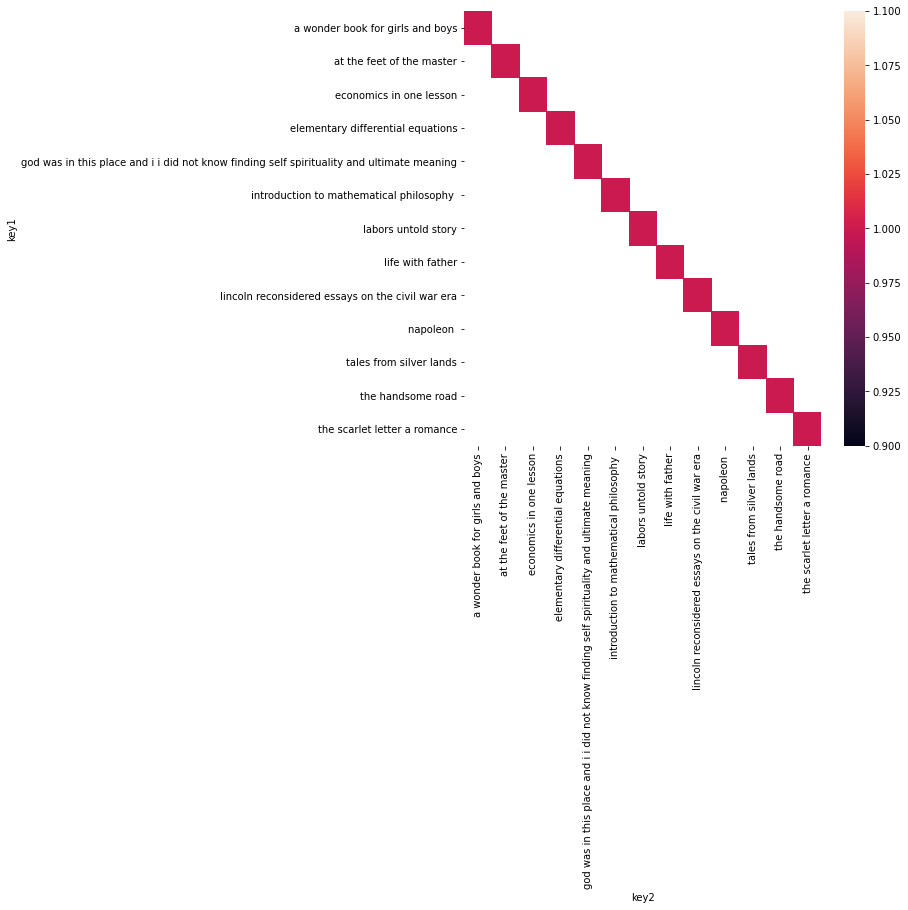

In [ ]:
# plot book titles in stead of keys
plt.figure(figsize=(8,8))
found_similar_items_with_lsh = {(titles[key1], titles[key2]): value for (key1, key2), value in found_similar_items_with_lsh.items()}
plot_heatmap(found_similar_items_with_lsh)



## Heatmap based on descriptions

In [ ]:
similar_descriptions

{(19, 20): 1.0,
 (21, 22): 1.0,
 (30, 31): 1.0,
 (66, 67): 1.0,
 (68, 69): 1.0,
 (82, 83): 1.0,
 (97, 98): 1.0}

In [ ]:
books_data_1['description'][72]

nan

In [ ]:
books_data_1['description'][236]

'The acclaimed author of American Dirt reveals the devastating effects of a shocking tragedy in this landmark true crime book—the first ever to look intimately at the experiences of both the victims and their families. A Rip in Heaven is Jeanine Cummins’ story of a night in April, 1991, when her two cousins Julie and Robin Kerry, and her brother, Tom, were assaulted on the Old Chain of Rocks Bridge, which spans the Mississippi River just outside of St. Louis. When, after a harrowing ordeal, Tom managed to escape the attackers and flag down help, he thought the nightmare would soon be over. He couldn’t have been more wrong. Tom, his sister Jeanine, and their entire family were just at the beginning of a horrific odyssey through the aftermath of a violent crime, a world of shocking betrayal, endless heartbreak, and utter disillusionment. It was a trial by fire from which no family member would emerge unscathed.'

In [ ]:
similar_descriptions
similar_descriptions_titles = {(titles[key1], titles[key2]): value for (key1, key2), value in similar_descriptions.items()}

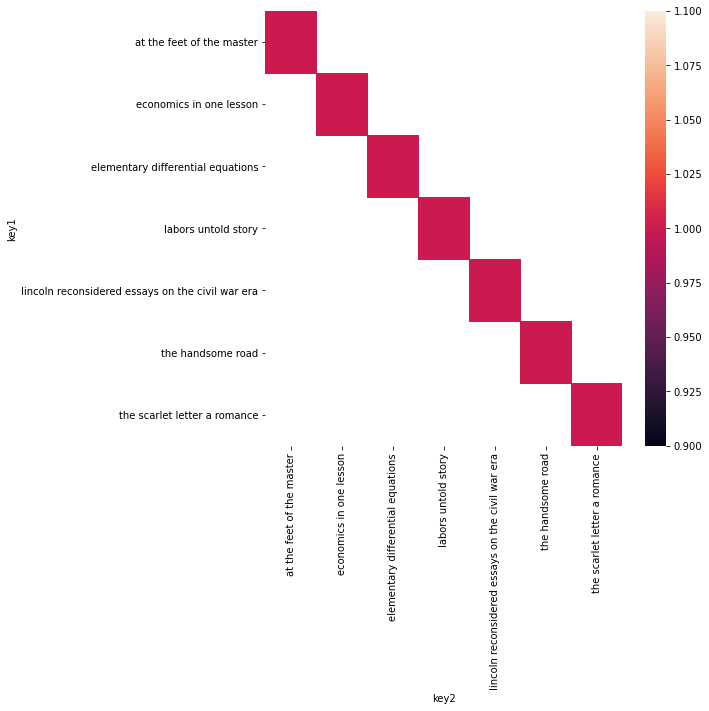

In [ ]:
plt.figure(figsize=(8,8))
plot_heatmap(similar_descriptions_titles)

# Books visualization

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
books_data_1.head(10)

,title,description,authors,published_date,categories,avg_rating
0,eyewitness travel guide to europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",2015-06-15,['Europe'],4.666667
1,voices from the farm adventures in community l...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],2012-08-21,['Biography & Autobiography'],5.000000
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.000000
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.000000
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.000000
5,the complete illustrated guide to chinese medi...,"This beautifully illustrated, full-color book ...",['Tom Williams'],2003,['Health & Fitness'],4.500000
6,night world daughters of darkness,"""There’s something strange about the new girls...",['L.J. Smith'],2016-12-06,['Juvenile Fiction'],3.500000
7,america at 1750 a social portrait,Demonstrates how the colonies developed into t...,['Richard Hofstadter'],1973,['History'],4.500000
8,death dream,"The authors probe the phenomenon of ""pre-death...","['Kelly Bulkeley', 'Patricia Bulkley']",2005,"['Body, Mind & Spirit']",3.625000
9,the food of love,Een heerlijke roman over culinaire verleiding ...,['Anthony Capella'],2013-12-17,['Fiction'],4.333333


In [ ]:
# Remove nan from descriptions
books_data_1['description'] = books_data_1['description'].fillna('')
book_descriptions = books_data_1['description'][0:100]

In [ ]:
books_data_1['categories']

0                           ['Europe']
1        ['Biography & Autobiography']
2                 ['Juvenile Fiction']
3                     ['Local author']
4                        ['Gardening']
                     ...              
36480             ['Health & Fitness']
36481                  ['Photography']
36482                              NaN
36483                              NaN
36484             ['Juvenile Fiction']
Name: categories, Length: 36485, dtype: object

In [ ]:

# Change dtype of categories to string
# Remove nan from categories
categories = books_data_1['categories'].fillna('').astype(str)
categories = categories.unique()
print(len(categories))
#print(categories)
# Find the 10 most frequent categories
# # Crprint(len(categories))


1933


In [ ]:
# Find the 10 most frequent categories
from collections import Counter
category_counts = Counter(categories)
#print(category_counts.most_common(10))

# Create a list of the 10 most frequent categories
top_categories = [category for category, count in category_counts.most_common(20)]
print(top_categories)

# Remove nan from top_categories
top_categories = [category for category in top_categories if category != 'nan']
# Remove Fiction from top_categories
top_categories = [category for category in top_categories if category != "['Fiction']"]
top_categories = [category for category in top_categories if category != ""]
print(top_categories)

# Create a new column with only the top categories
books_data_1['top_category'] = books_data_1['categories'].apply(lambda x: ' '.join([category for category in x.split() if category in top_categories]))

# Only take books with a top category
books_data_2 = books_data_1[books_data_1['top_category'] != '']
print(books_data_2.shape)
books_data_2.tail(10)

["['Europe']", "['Biography & Autobiography']", "['Juvenile Fiction']", "['Local author']", "['Gardening']", "['Health & Fitness']", "['History']", "['Body, Mind & Spirit']", "['Fiction']", '', "['Religion']", "['Comics & Graphic Novels']", "['Business & Economics']", "['Mathematics']", "['Adultery']", "['Mythology, Classical']", "['Directories']", "['Performing Arts']", "['Sports & Recreation']", "['France']"]
["['Europe']", "['Biography & Autobiography']", "['Juvenile Fiction']", "['Local author']", "['Gardening']", "['Health & Fitness']", "['History']", "['Body, Mind & Spirit']", "['Religion']", "['Comics & Graphic Novels']", "['Business & Economics']", "['Mathematics']", "['Adultery']", "['Mythology, Classical']", "['Directories']", "['Performing Arts']", "['Sports & Recreation']", "['France']"]


AttributeError: 'float' object has no attribute 'split'

In [ ]:
books_data_1['top_category']
# How many of each top category are there?
top_category_counts = books_data_2['top_category'].value_counts()
print(top_category_counts)


['History']      556
['Religion']     470
['Education']     50
['Goddesses']      1
['Diaries']        1
Name: top_category, dtype: int64


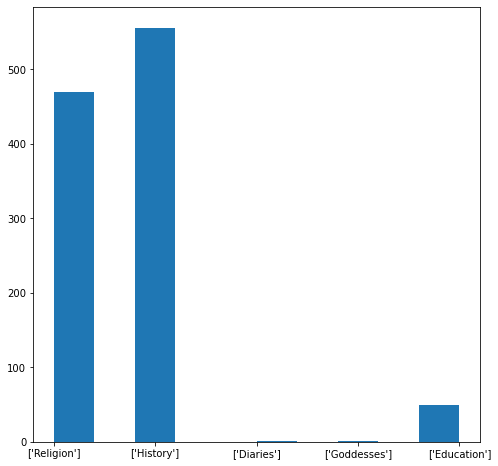

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(books_data_2['top_category'], bins=10)
plt.show()

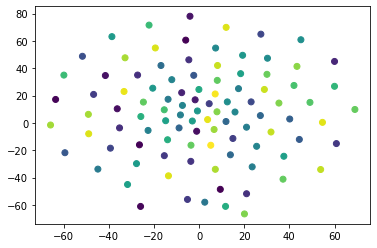

In [ ]:
# Step 1: Extract features (TF-IDF in this example)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(book_descriptions)

# Step 2: Calculate cosine similarities
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 3: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(tfidf_matrix)

labels = np.random.uniform(15, 80, len(book_descriptions))

# Step 4: Visualize the results
plt.scatter(reduced_features[:, 0], reduced_features[:, 1],c=labels, cmap='viridis')
plt.show()


# Clustering

In [47]:
# Find dtypes of books_data_1
books_data_1.head()

,title,description,authors,published_date,categories,avg_rating
0,eyewitness travel guide to europe,The DK Eyewitness Travel Guide: Eastern and Ce...,"['Dorling Kindersley Publishing Staff', 'Jonat...",2015-06-15,['Europe'],4.666667
1,voices from the farm adventures in community l...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],2012-08-21,['Biography & Autobiography'],5.000000
2,tess and the highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],4.000000
3,communicating with orcas the whales perspective,NaN,['Mary J. Getten'],2002,['Local author'],5.000000
4,the impatient gardeners lawn book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],1987,['Gardening'],4.000000


In [45]:
books_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25140 entries, 0 to 32931
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           25140 non-null  object 
 1   description     25139 non-null  object 
 2   authors         24920 non-null  object 
 3   published_date  25100 non-null  object 
 4   categories      24417 non-null  object 
 5   avg_rating      25140 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [60]:
books_data_1['published_date']


0        2015-06-15
1        2012-08-21
2           2002-11
3              2002
4              1987
            ...    
32925    1998-01-27
32926    1995-04-15
32927    2005-04-17
32928    2016-08-17
32931    2000-06-01
Name: published_date, Length: 25140, dtype: object

In [ ]:
pd.to_datetime(df['Time stamp'], dayfirst=True)


In [65]:
clean_df.index = pd.to_datetime(clean_df['year'], format='%Y')


NameError: name 'clean_df' is not defined

In [64]:

#books_data_1['published date'] = pd.to_datetime(books_data_1['published_date'].str.strip(), format='%d/%m%Y')
#books_data_1['published_date'] = pd.to_datetime(books_data_1['published_date'].str.strip(), format='%Y-%m-')
books_data_1['published_date'] = pd.to_datetime(books_data_1['published_date'], format='%Y')


#df['Time stamp'] = pd.to_datetime(df['Time stamp'], dayfirst=True)


ValueError: unconverted data remains: -06-15

In [42]:
# Cluster books based on avg_rating and year

books_data_1.head()

# Make a new column that is the published_year

books_data_1['published date'] = pd.to_datetime(books_data_1['published_date'])
books_data_1['published_year'] = books_data_1['published_date'].dt.year


#books_data_1['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
# add a column for Year

#df['Year'] = df['Purchase Date'].dt.year


#books_data_1['published_year'] = books_data_1['published_date'].apply(lambda x: x.split('-')[0])


ParserError: Unknown string format: 19??